<a href="https://colab.research.google.com/github/mariiapopova/netpyne_course_2021/blob/main/Netpyne_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetPyNE Course 

## Colab

In [1]:
!pip install neuron

     |████████████████████████████████| 12.6MB 36.1MB/s 


In [2]:
!which nrnivmodl

/usr/local/bin/nrnivmodl


## Install NetPYNe

In [3]:
pip install netpyne

     |████████████████████████████████| 317kB 27.7MB/s 


In [4]:
import neuron

In [5]:
import netpyne

In [6]:
from neuron import h

Here I've just tried some commands.


In [7]:
import plotly

In [8]:
import plotly.graph_objects as go

In [9]:
print(dir(h))

['APCount', 'AlphaSynapse', 'Avogadro_constant', 'BBSaveState', 'CVode', 'DEG', 'Deck', 'E', 'Exp2Syn', 'ExpSyn', 'FARADAY', 'FInitializeHandler', 'File', 'GAMMA', 'GUIMath', 'Glyph', 'Graph', 'HBox', 'IClamp', 'Impedance', 'IntFire1', 'IntFire2', 'IntFire4', 'KSChan', 'KSGate', 'KSState', 'KSTrans', 'L', 'LinearMechanism', 'List', 'Matrix', 'MechanismStandard', 'MechanismType', 'NetCon', 'NetStim', 'OClamp', 'PHI', 'PI', 'PPShape', 'PWManager', 'ParallelContext', 'PatternStim', 'PlotShape', 'PointProcessMark', 'Pointer', 'PtrVector', 'PythonObject', 'R', 'Ra', 'Random', 'RangeVarPlot', 'SEClamp', 'SaveState', 'Section', 'SectionBrowser', 'SectionList', 'SectionRef', 'Shape', 'SingleChan', 'StateTransitionEvent', 'StringFunctions', 'SymChooser', 'TQueue', 'TextEditor', 'Timer', 'VBox', 'VClamp', 'ValueFieldEditor', 'Vector', '__abs__', '__add__', '__bool__', '__call__', '__class__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__'

# Basic
Here I try commands mentioned in the course.

In [10]:
from neuron import h

In [11]:
from neuron.units import mV, ms, um

In [12]:
from neuron import rxd

Above commands for chemical dynamics and unit definitions. 
Below I load library.

In [13]:
h.load_file('stdrun.hoc')

1.0

In [14]:
apical = h.Section(name='apical')

Above is the new section. Below I check its length.

In [15]:
apical.L

100.0

In [16]:
apical.diam

500.0

# Exercise 1.

In [26]:
from neuron import h 
from neuron.units import ms, mV, um 
import plotly
h.load_file('stdrun.hoc')

axon=h.Section(name='axon')
#h.hh.insert(axon)
axon.insert('hh')

axon

In [28]:
axon.L = 1000

In [30]:
axon.diam = 1

In [31]:
axon.nseg = 1001

In [39]:
stim = h.IClamp(axon(0)) #stimulating the bottom
stim.delay = 1*ms
stim.dur = 0.1*ms
stim.amp = 1

rvp = h.RangeVarPlot("v", axon(0), axon(1))

h.finitialize(-65*mV)
times=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

my_plot = rvp.plot(plotly, name="t=0", line={"width": 4})

for t in times:
  h.continuerun(t)
  my_plot = rvp.plot(my_plot, name=f"t={t}", line={"width": 4})

In [40]:
my_plot = my_plot.update_layout({
    "xaxis_title": "position (µm)",
    "yaxis_title": "membrane potential (mV)"
})
my_plot.show()

In [43]:
axon.Ra = 100

In [44]:
h.finitialize(-65*mV)
times=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

my_plot = rvp.plot(plotly, name="t=0", line={"width": 4})

for t in times:
  h.continuerun(t)
  my_plot = rvp.plot(my_plot, name=f"t={t}", line={"width": 4})

In [45]:
my_plot = my_plot.update_layout({
    "xaxis_title": "position (µm)",
    "yaxis_title": "membrane potential (mV)"
})
my_plot.show()

# Exercise 2.

In [61]:
soma = h.Section(name='soma')
h.hh.insert(soma)
soma.L = soma.diam = 10*um

In [62]:
ikasoma=h.Vector()
ikasoma.record(soma(0.5)._ref_ik)

inasoma=h.Vector()
inasoma.record(soma(0.5)._ref_ina)

Vector[67]

In [63]:
v=h.Vector().record(soma(0.5)._ref_v)
time=h.Vector().record(h._ref_t)
stim=h.SEClamp(soma(0.5))

In [64]:
stim.amp1=-65*mV
stim.amp2 = 20*mV
stim.amp3 = -65*mV 
stim.dur1= 5*ms 
stim.dur2 = 20*ms
stim.dur3 = 10000*ms

In [65]:
h.finitialize(-65*mV)
h.continuerun(30*ms)

0.0

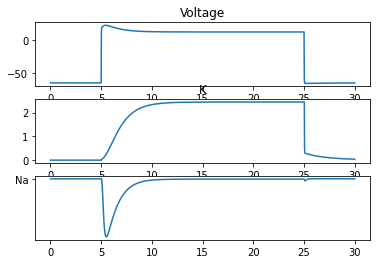

In [67]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.subplot(3,1,1)
plt.plot(time,v)
plt.title('Voltage')
plt.subplot(3,1,2)
plt.plot(time,ikasoma)
plt.title('K')
plt.subplot(3,1,3)
plt.plot(time,inasoma)
plt.plot('Na')

In [68]:
#import numpy as np
#import plotly.graph_objects as go

#vs=np.arange(-80,40,10)

#fig = go.Figure()

#for v in vs:
#  stim.amp2=v
#  h.finitialize(-65*mV)
#  h.continuerun(30*ms)
#  fig.add_trace(go.Scatter(x=time, y=ikasoma))

# Exercise 3.

In [69]:
from neuron.units import m

In [95]:
axon = h.Section(name='axon')
axon.L = 0.1*m
axon.diam=0.5*um
axon.nseg=1001

In [96]:
axon.insert('hh')

axon

In [97]:
ns=h.NetStim()

In [98]:
ns.number=1
ns.start=1

In [99]:
syn = h.ExpSyn(axon(0))

In [100]:
syn.tau = 3

In [101]:
nc = h.NetCon(ns,syn)
nc.weight[0]=0.1

In [108]:
v=h.Vector().record(axon(0.5)._ref_v)
time=h.Vector().record(h._ref_t)
h.finitialize(-65*mV)
h.continuerun(200)

0.0

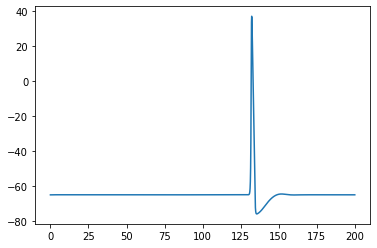

In [109]:
from matplotlib import pyplot as plt 
plt.plot(time,v)

In [ ]:
crossing_vecs=[h.Vector() for seg in axon]
monitors = [h.NetCon(seg._ref_v, None, sec=axon) for seg in axon]

for monitor, vec in zip(monitors, crossing_vecs):